### Import Libraries

In [10]:
import sys
sys.path.append('../')

from awpy.parser.demoparser import DemoParser
from awpy.analytics.map_control import parseRoundFrame, calcMapControl, calculate_round_map_control_metrics
from awpy.visualization.plot import plot_map_control_snapshot, plot_frame_map_control, create_round_map_control_gif, plot_map_control_metrics, save_map_control_graphic

import os
import matplotlib
%matplotlib inline

### Import and Parse Demo

In [11]:
demo_filepath = "../../../awpy repos/csgo/videos/ELEAGUE-Major2018-faze-vs-cloud9-bo3/faze-vs-cloud9-m3-inferno.dem"


demo_parser = DemoParser(demofile = demo_filepath, demo_id = "FAZE-C9-Inferno", parse_rate=128)

# Parse the demofile, output results to a dictionary and a dataframe.
#data_df = demo_parser.parse(return_type="df")
data = demo_parser.parse()


### Parse Round Data, Calculate Map Control Values, Visualize Map Control for Frame

The following functions can be used to extract alive players' positions given an awpy frame, calculate the map control values for relevant nav tiles given an awpy frame, and visualize the current map control (given output from `calcMapControl`).

In [12]:
'''
Parse frame to extract alive player locations
'''
parsedData = parseRoundFrame(data['gameRounds'][29]['frames'][8])

In [13]:
'''
Calculate map control values for tiles based on
current player positions in given frame
'''
map_control_values = calcMapControl(data['mapName'], data['gameRounds'][29]['frames'][8])

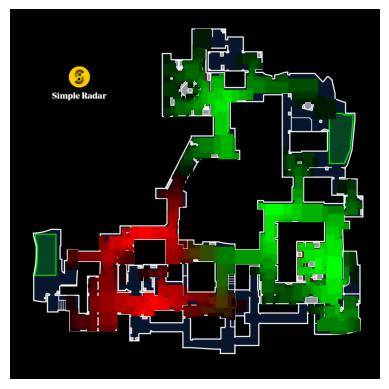

In [14]:
'''
Visualize map control given output from calcMapControl
'''
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'])

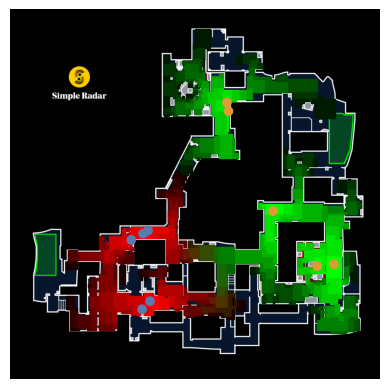

In [15]:
'''
Visualize map control and player positions given output 
from parseRoundFrame and calcMapControl
'''
parsedData = parseRoundFrame(data['gameRounds'][29]['frames'][8])
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'], player_pos = parsedData)

Some nav tiles don't have any neighboring tiles (such as a boosted spot), which can cause issues with map control calculations/visualizations. So, there is an argument for `calcMapControl` to 'estimate neighbors' for these isolated tiles.

In [25]:
tmpFrame = data['gameRounds'][31]['frames'][8]
parsedData = parseRoundFrame(tmpFrame)


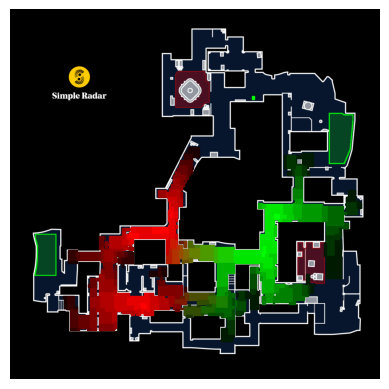

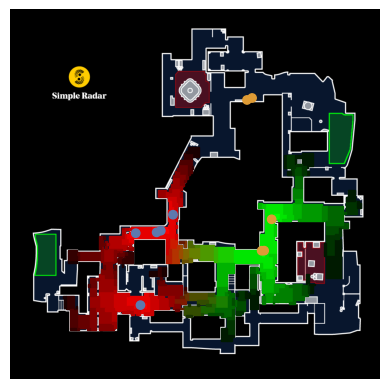

In [26]:
### Without isolated tiles' neighbors approximated
map_control_values = calcMapControl(data['mapName'], tmpFrame, False)
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'])
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'], parsedData)

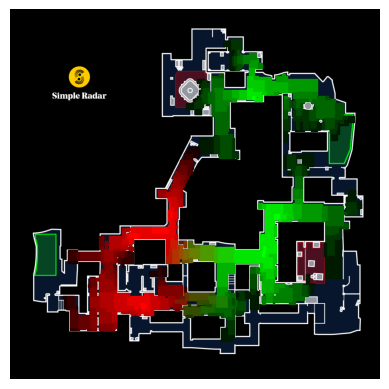

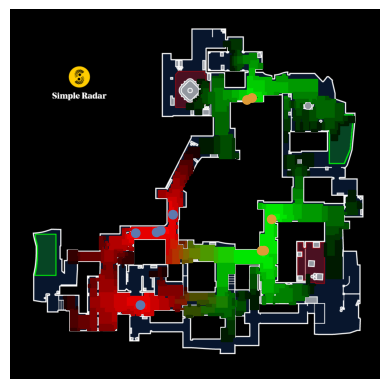

In [27]:
### With isolated tiles' neighbors approximated
map_control_values = calcMapControl(data['mapName'], tmpFrame, True)
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'])
plot_map_control_snapshot(data['mapName'], map_control_values['ct'], map_control_values['t'], parsedData)

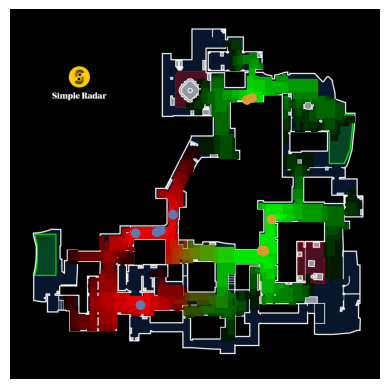

In [19]:
'''
Visualize map control given awpy frame
'''
testFrame = data['gameRounds'][31]['frames'][8]
plot_frame_map_control(data['mapName'], testFrame, players_plotted = True)

### Visualize Map Control for Round

The following functions can be used to visualize the map control progress for an entire round.

* `create_round_map_control_gif` can be used to save a gif to file whose individual frames are similar to the above visualizations. 
* `calculate_round_map_control_metrics` can be used to return a list of map control metrics for a given awpy round
* `plot_map_control_metrics` can be used to generate a plot for a given list of map control metrics
* `save_map_control_graphic` can be used to generate a map control graphic (gif including minimap visualization and map control metric plot) for an entire round and save it to file

In [20]:
'''
Create map control gif for a given awpy frame
'''

testRound = data['gameRounds'][29]
create_round_map_control_gif(data['mapName'], testRound, players_plotted=True, gif_filepath='./results/stewie_inferno_hold_players.gif')

Saving/loading frames
Creating gif!


In [21]:
'''
Generate map control metrics for each frame
in a given awpy round
'''
mcMetrics = calculate_round_map_control_metrics(data['mapName'], data['gameRounds'][29])

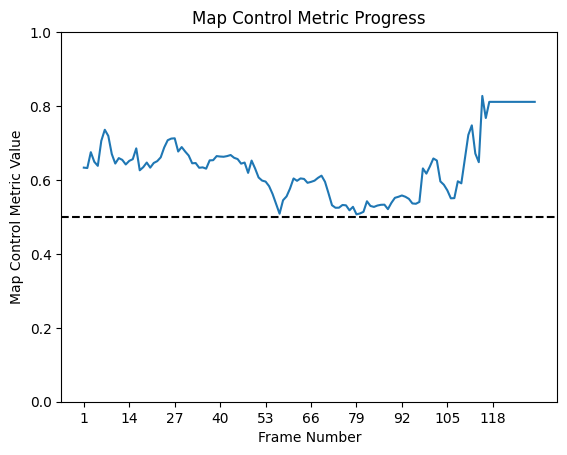

In [22]:
'''
Create plot for given list of map control metrics
'''
plot_map_control_metrics(mcMetrics)

In [23]:
'''
Generate a map control graphic (gif including minimap visualization 
and map control metric plot) for an entire round and save it to file
'''
save_map_control_graphic(map_name=data['mapName'], frames=data['gameRounds'][29]['frames'], save_path='./results/stewie_inferno_hold_mc_graphic.gif')


Saving/loading frames!
Saving map control graphic gif


In [28]:
testFrame

{'isKillFrame': False,
 'tick': 537161,
 'seconds': 8.7421875,
 'clockTime': '01:47',
 't': {'side': 'T',
  'teamName': 'FaZe Clan',
  'teamEqVal': 26750,
  'alivePlayers': 5,
  'totalUtility': 14,
  'players': [{'steamID': 76561197988627193,
    'name': 'olofmeister',
    'team': 'FaZe Clan',
    'side': 'T',
    'x': -42.51047897338867,
    'y': 868.4791870117188,
    'z': 54.92256546020508,
    'eyeX': -42.51047897338867,
    'eyeY': 868.4791870117188,
    'eyeZ': 118.98512649536133,
    'velocityX': 231.26878356933594,
    'velocityY': 53.74903106689453,
    'velocityZ': 0,
    'viewX': 37.6336669921875,
    'viewY': 2.252197265625,
    'hp': 100,
    'armor': 100,
    'activeWeapon': 'Smoke Grenade',
    'flashGrenades': 1,
    'smokeGrenades': 1,
    'heGrenades': 1,
    'fireGrenades': 1,
    'totalUtility': 4,
    'lastPlaceName': 'TRamp',
    'isAlive': True,
    'isBot': False,
    'isBlinded': False,
    'isAirborne': False,
    'isDucking': False,
    'isDuckingInProgress':